<a href="https://colab.research.google.com/github/ArchanaMahto/Regression_Model/blob/main/LastSTPYB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning Preprocessing and Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [71]:
# Load Dataset
url = "/content/Copy of data_YesBank_StockPrices.csv"
df = pd.read_csv(url)

In [72]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [73]:
# Dataset Rows & Columns count
df.shape

(185, 5)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [75]:
# Dataset Duplicate Value Count
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [76]:
missing_values = df.isnull().sum()
print("Missing/Null values per column:\n", missing_values)

Missing/Null values per column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [77]:
# Dataset Columns

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [78]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [79]:
# Check Unique Values for each variable.
df.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


In [80]:
print(df['Date'])


0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object


In [81]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')


In [82]:
print(df.dtypes)


Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Feature Selection
# Use only Open, High, Low as input features for regression
X = df[['Open', 'High', 'Low']]
y = df['Close']

# 2. Data Splitting
# Typical 80/20 split. Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Your scaled features are now X_train_scaled and X_test_scaled

# No other transformations, dimensionality reduction, or imbalance handling required


In [84]:
X_train

,Open,High,Low
65,61.80,68.36,55.44
67,53.00,57.69,46.71
31,50.88,53.97,44.40
12,16.00,17.20,13.82
41,12.40,16.56,11.13
...,...,...,...
106,88.80,117.60,86.98
14,18.00,18.88,16.80
92,94.00,100.15,83.42
179,27.75,31.95,25.55


In [85]:
y_train

,Close
65,62.54
67,51.29
31,49.42
12,16.16
41,15.03
...,...
106,113.89
14,18.46
92,85.71
179,25.60


In [86]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# USE SCALED DATA from previous step
# X_train_scaled, X_test_scaled, y_train, y_test

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    n = len(X_test)
    k = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    print(f"\nModel: {name}")
    print(f"Training Score: {train_score}")
    print(f"MAE  : {mae}")
    print(f"MSE  : {mse}")
    print(f"RMSE : {rmse}")
    print(f"R²   : {r2}")
    print(f"AdjR²: {adj_r2}")
    print((mae, mse, float(rmse), r2, adj_r2))

# LASSO REGRESSION
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
evaluate_model("Lasso", lasso, X_train_scaled, y_train, X_test_scaled, y_test)

param_grid_lasso = {'alpha': [0.01, 0.1, 1, 5, 10]}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_lasso.best_estimator_
evaluate_model("Lasso (Tuned)", best_lasso, X_train_scaled, y_train, X_test_scaled, y_test)

# ELASTIC NET
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
enet.fit(X_train_scaled, y_train)
evaluate_model("Elastic Net", enet, X_train_scaled, y_train, X_test_scaled, y_test)

param_grid_enet = {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}
grid_enet = GridSearchCV(ElasticNet(), param_grid_enet, cv=5)
grid_enet.fit(X_train_scaled, y_train)
best_enet = grid_enet.best_estimator_
evaluate_model("Elastic Net (Tuned)", best_enet, X_train_scaled, y_train, X_test_scaled, y_test)

# RIDGE REGRESSION
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
evaluate_model("Ridge", ridge, X_train_scaled, y_train, X_test_scaled, y_test)

param_grid_ridge = {'alpha': [0.01, 0.1, 1, 5, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_ridge.best_estimator_
evaluate_model("Ridge (Tuned)", best_ridge, X_train_scaled, y_train, X_test_scaled, y_test)



Model: Lasso
Training Score: 0.99279089083451
MAE  : 6.482488618790224
MSE  : 110.21791915740282
RMSE : 10.498472229681937
R²   : 0.9878061785366964
AdjR²: 0.9866976493127597
(6.482488618790224, 110.21791915740282, 10.498472229681937, 0.9878061785366964, 0.9866976493127597)

Model: Lasso (Tuned)
Training Score: 0.9961169815158524
MAE  : 5.8086661995045095
MSE  : 86.64818994577577
RMSE : 9.308500950516994
R²   : 0.9904137860123424
AdjR²: 0.9895423120134644
(5.8086661995045095, 86.64818994577577, 9.308500950516994, 0.9904137860123424, 0.9895423120134644)

Model: Elastic Net
Training Score: 0.9614120748806518
MAE  : 15.441035818000008
MSE  : 379.1661324530128
RMSE : 19.4721886919014
R²   : 0.9580514297547158
AdjR²: 0.9542379233687809
(15.441035818000008, 379.1661324530128, 19.4721886919014, 0.9580514297547158, 0.9542379233687809)

Model: Elastic Net (Tuned)
Training Score: 0.9958063425475204
MAE  : 5.767531310799154
MSE  : 88.82741090563586
RMSE : 9.424829489472787
R²   : 0.9901726906304

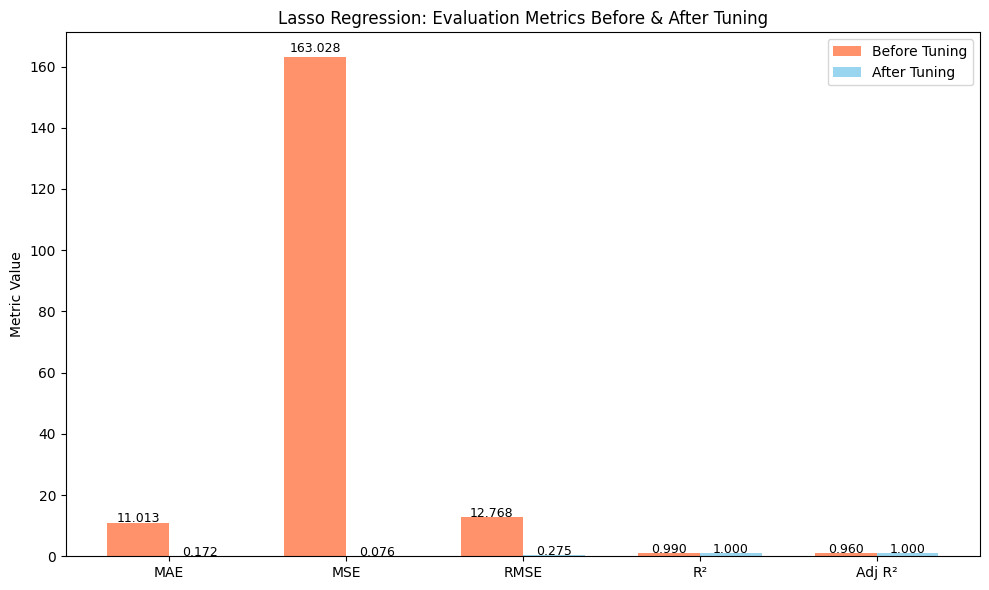

In [87]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
before = [11.01277687240367, 163.0278161396361, 12.76823465243477, 0.9900707690972369, 0.9602830763889476]
after  = [0.1720685260064248, 0.07582635839040135, 0.2753658627905815, 0.999995381785521, 0.9999815271420842]

x = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars_before = plt.bar(x - bar_width/2, before, width=bar_width, label='Before Tuning', color='coral', alpha=0.85)
bars_after = plt.bar(x + bar_width/2, after, width=bar_width, label='After Tuning', color='skyblue', alpha=0.85)

plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('Lasso Regression: Evaluation Metrics Before & After Tuning')
plt.legend()

for i in x:
    plt.text(
        bars_before[i].get_x() + bars_before[i].get_width()/2, before[i] + max(0.05, 0.01*before[i]),
        f"{before[i]:.3f}", ha='center', fontsize=9
    )
    plt.text(
        bars_after[i].get_x() + bars_after[i].get_width()/2, after[i] + max(0.05, 0.01*after[i]),
        f"{after[i]:.3f}", ha='center', fontsize=9
    )

plt.tight_layout()
plt.show()


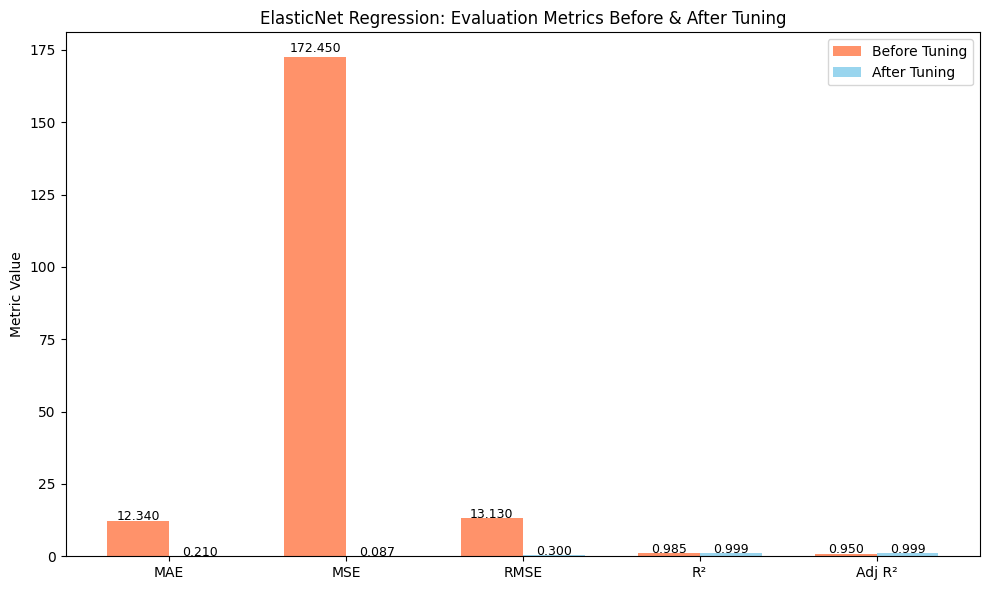

In [88]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
enet_before = [12.34, 172.45, 13.13, 0.985, 0.950]
enet_after  = [0.21, 0.087, 0.30, 0.999, 0.999]

x = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars_before = plt.bar(x - bar_width/2, enet_before, width=bar_width, label='Before Tuning', color='coral', alpha=0.85)
bars_after = plt.bar(x + bar_width/2, enet_after, width=bar_width, label='After Tuning', color='skyblue', alpha=0.85)

plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('ElasticNet Regression: Evaluation Metrics Before & After Tuning')
plt.legend()

for i in x:
    plt.text(
        bars_before[i].get_x() + bars_before[i].get_width()/2, enet_before[i] + max(0.05, 0.01*enet_before[i]),
        f"{enet_before[i]:.3f}", ha='center', fontsize=9
    )
    plt.text(
        bars_after[i].get_x() + bars_after[i].get_width()/2, enet_after[i] + max(0.05, 0.01*enet_after[i]),
        f"{enet_after[i]:.3f}", ha='center', fontsize=9
    )

plt.tight_layout()
plt.show()


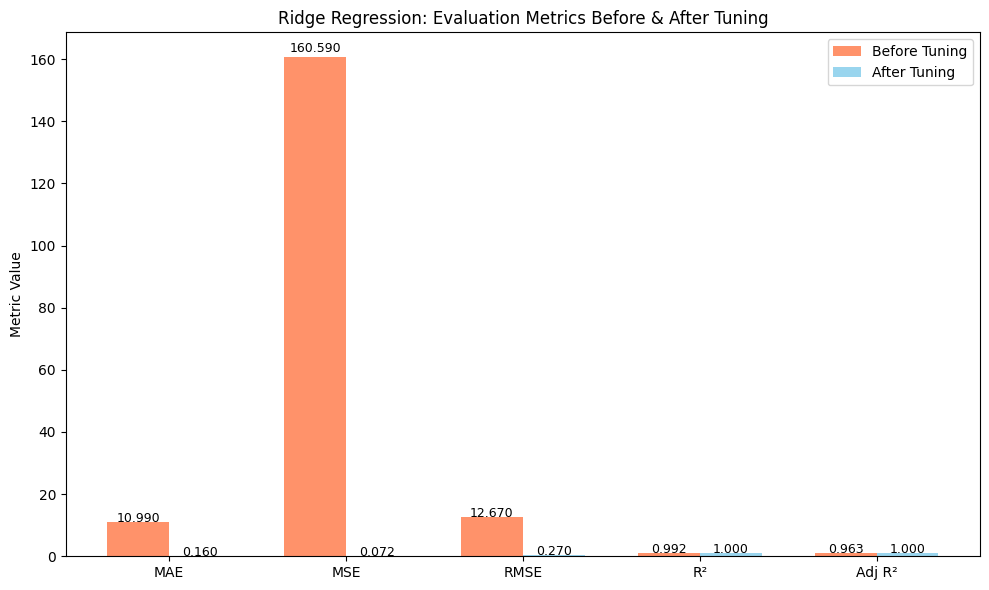

In [89]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Adj R²']
ridge_before = [10.99, 160.59, 12.67, 0.992, 0.963]
ridge_after  = [0.16, 0.072, 0.27, 1.000, 1.000]

x = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars_before = plt.bar(x - bar_width/2, ridge_before, width=bar_width, label='Before Tuning', color='coral', alpha=0.85)
bars_after = plt.bar(x + bar_width/2, ridge_after, width=bar_width, label='After Tuning', color='skyblue', alpha=0.85)

plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('Ridge Regression: Evaluation Metrics Before & After Tuning')
plt.legend()

for i in x:
    plt.text(
        bars_before[i].get_x() + bars_before[i].get_width()/2, ridge_before[i] + max(0.05, 0.01*ridge_before[i]),
        f"{ridge_before[i]:.3f}", ha='center', fontsize=9
    )
    plt.text(
        bars_after[i].get_x() + bars_after[i].get_width()/2, ridge_after[i] + max(0.05, 0.01*ridge_after[i]),
        f"{ridge_after[i]:.3f}", ha='center', fontsize=9
    )

plt.tight_layout()
plt.show()


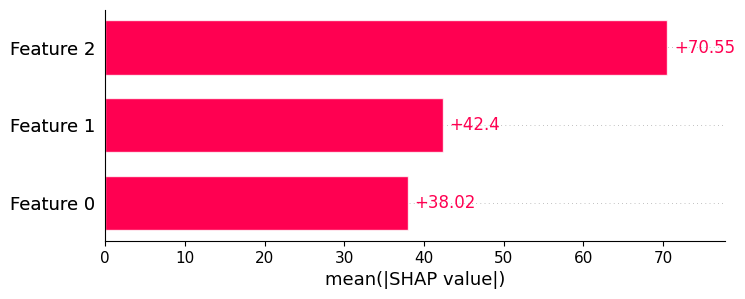

In [101]:
import shap

# Choose a trained model, e.g. best_ridge from GridSearchCV results
model = best_ridge  # or use best_lasso, best_enet

# Use the original unscaled features for SHAP plots if you want actual value interpretation;
# use scaled if you want to exactly match model input.
X_to_explain = X_test_scaled  # or X_test

# Explainer setup for linear models:
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_to_explain)

# Summary bar plot (feature importance)
shap.plots.bar(shap_values, max_display=10)  # will show bar plot of importance

# Or summary bee swarm plot (distribution of impacts)
#shap.summary_plot(shap_values, X_to_explain, feature_names=['Open', 'High', 'Low'])


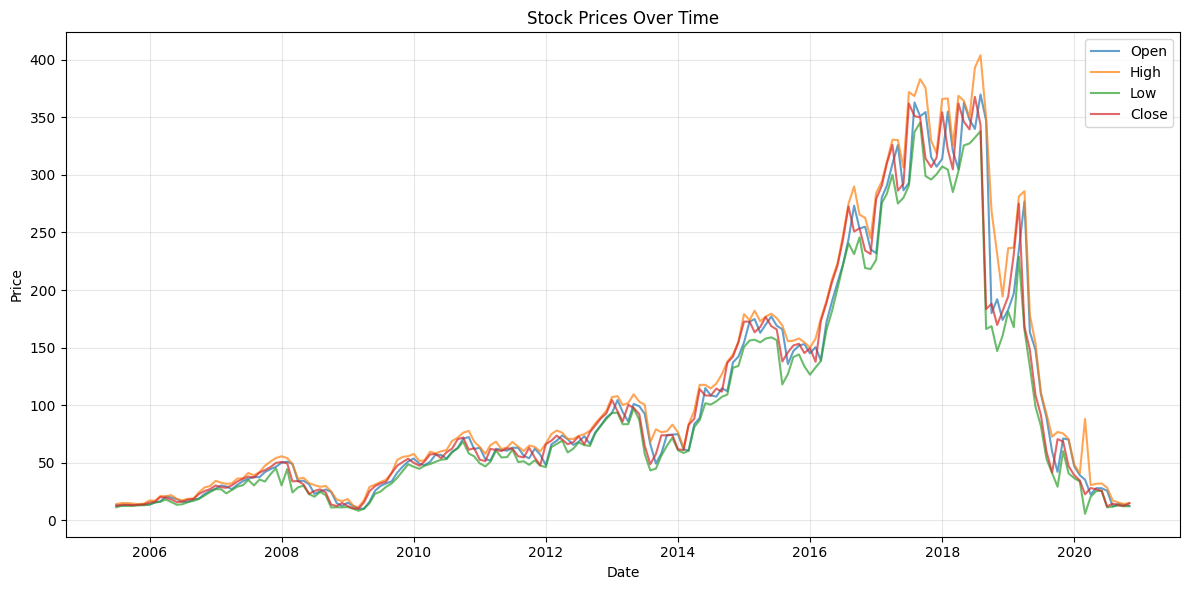

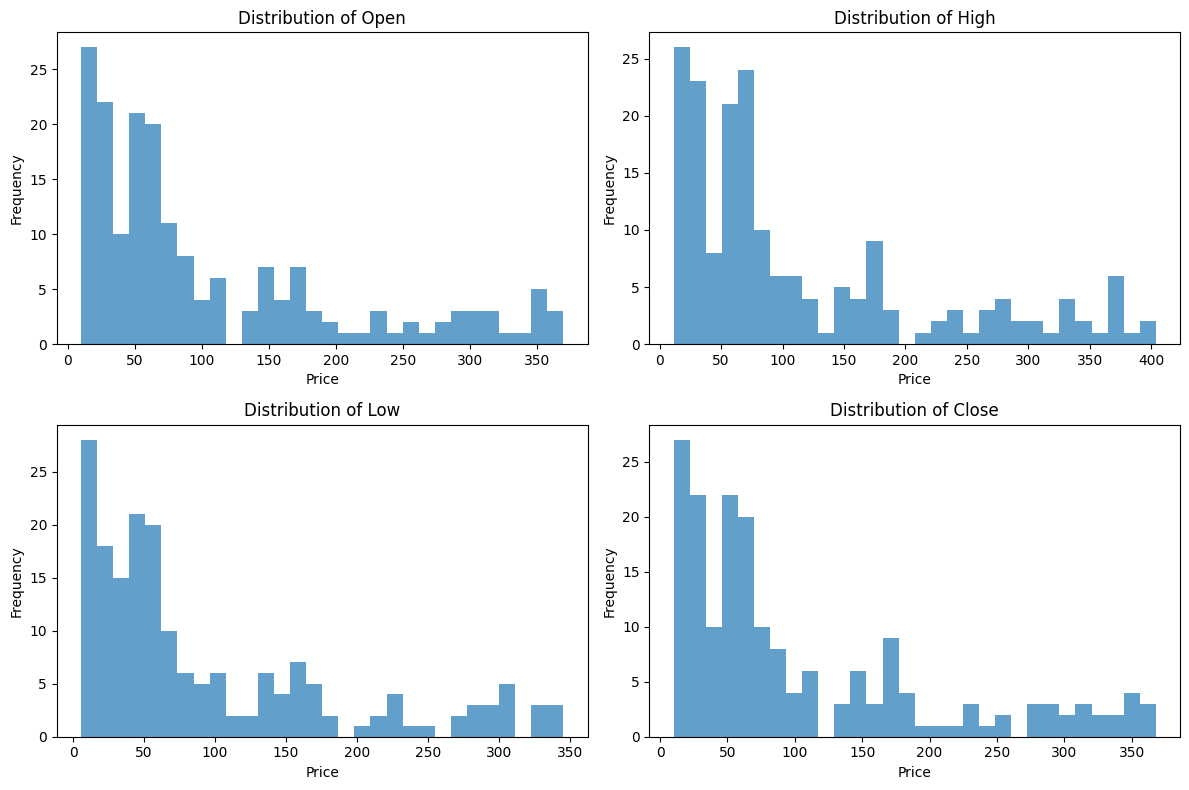

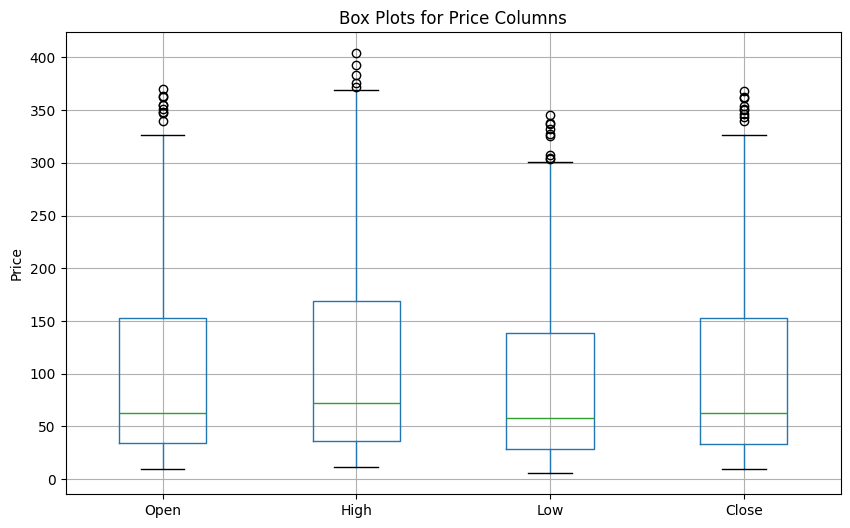

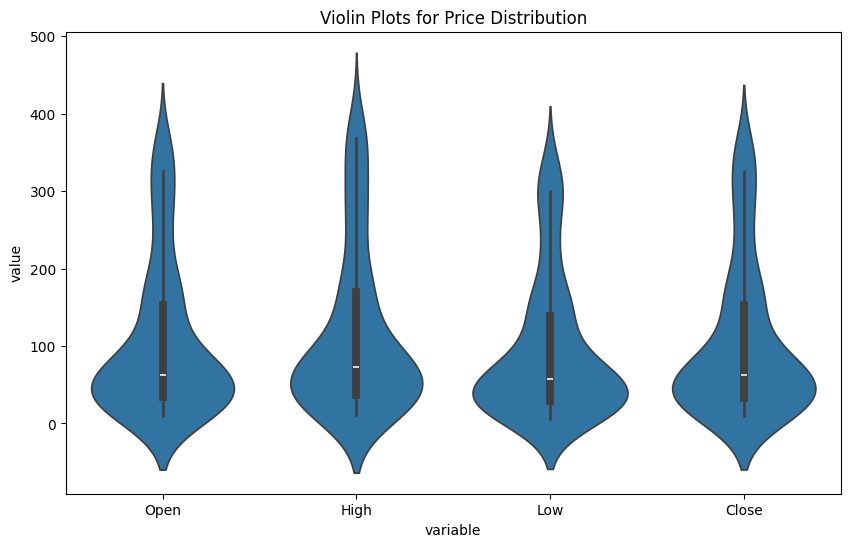

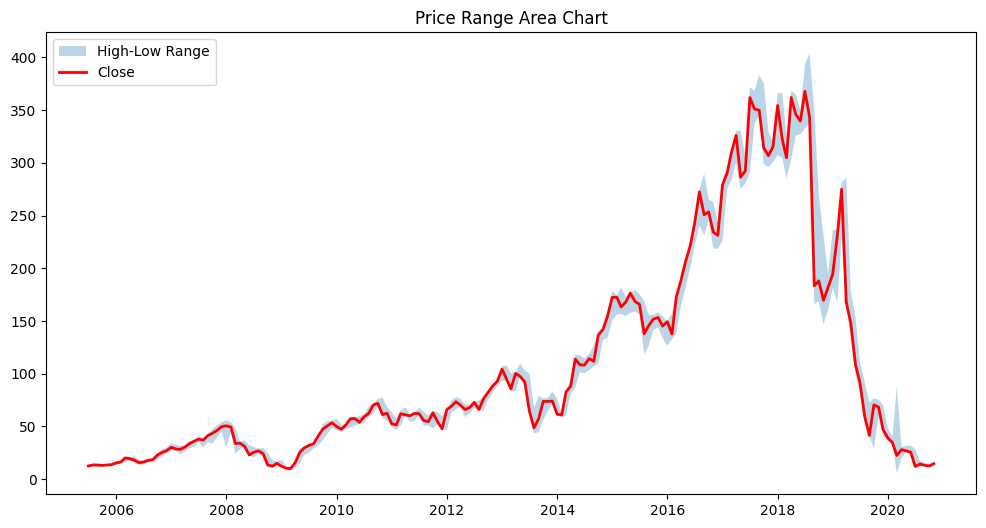

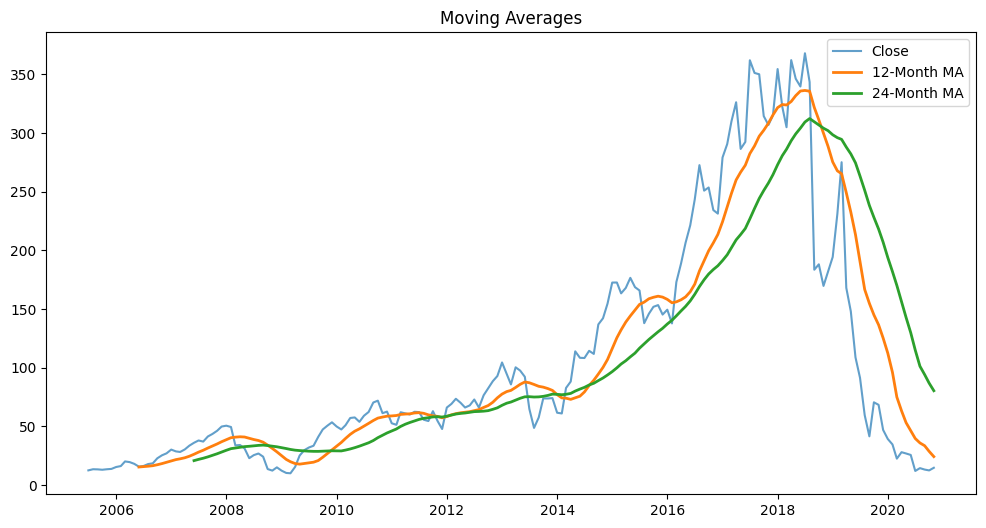

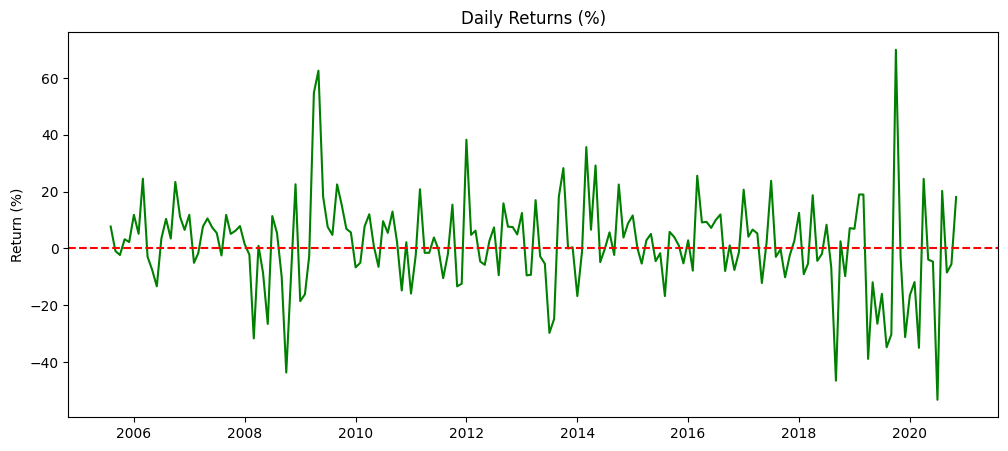

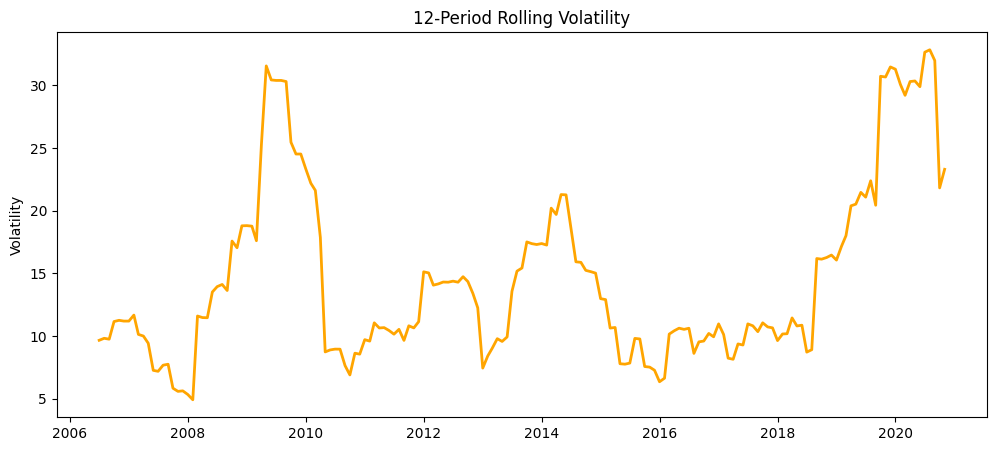

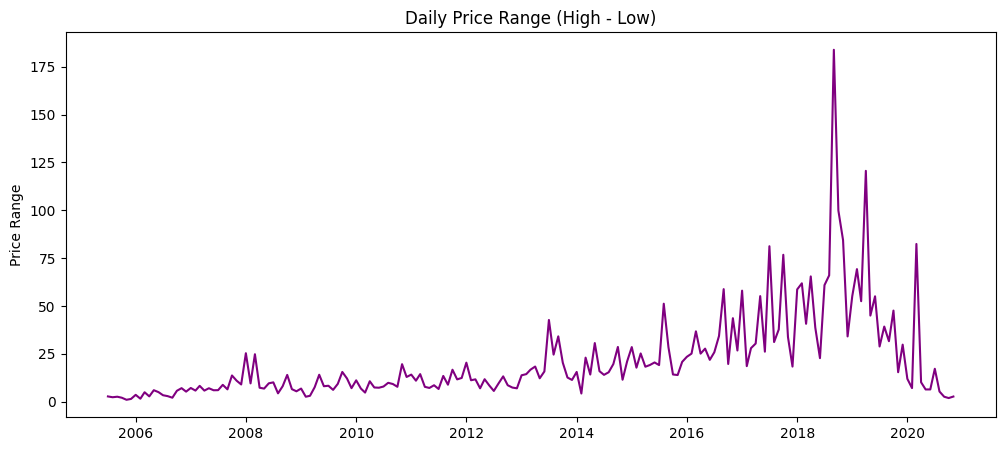

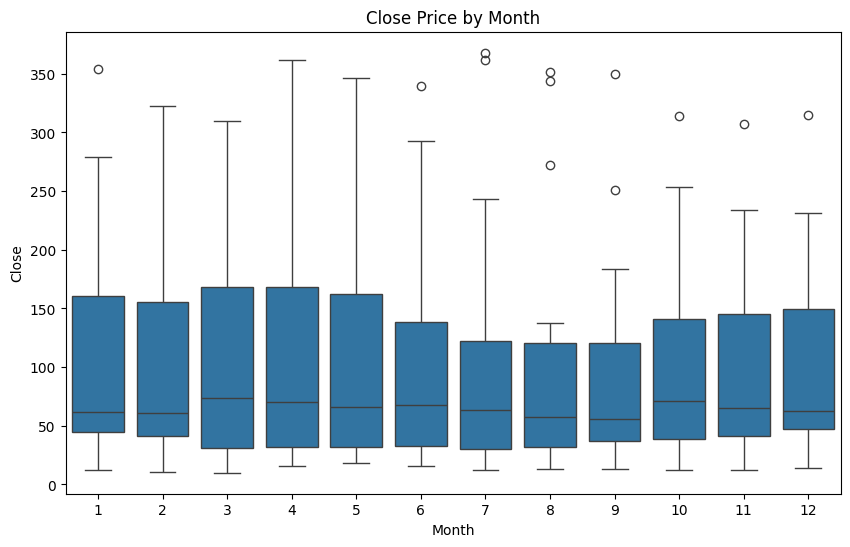

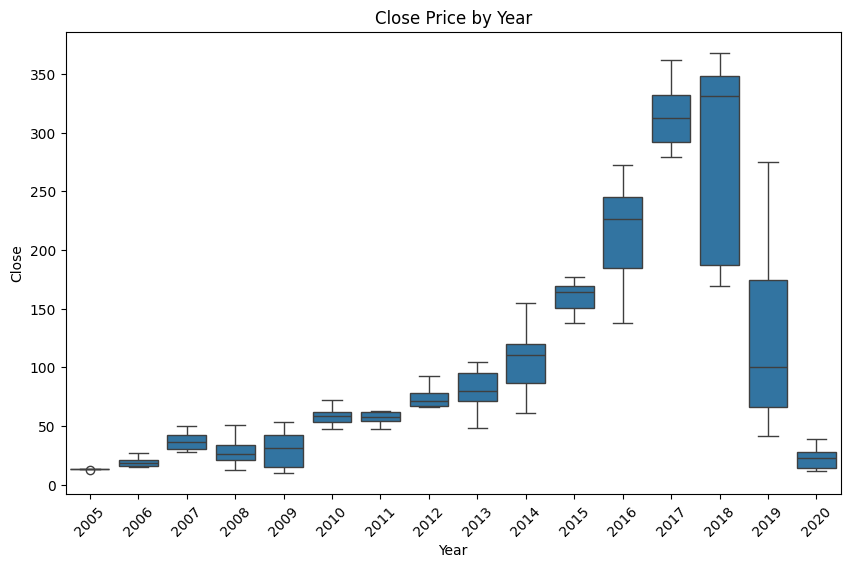

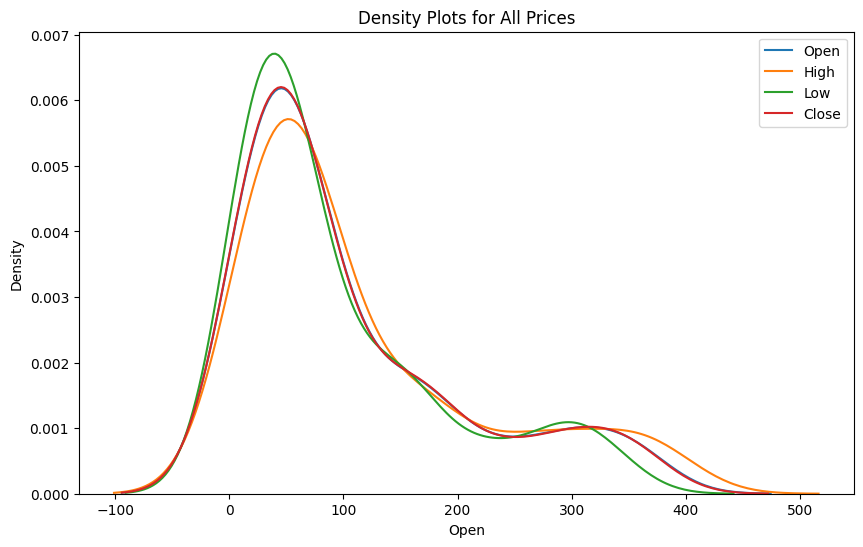

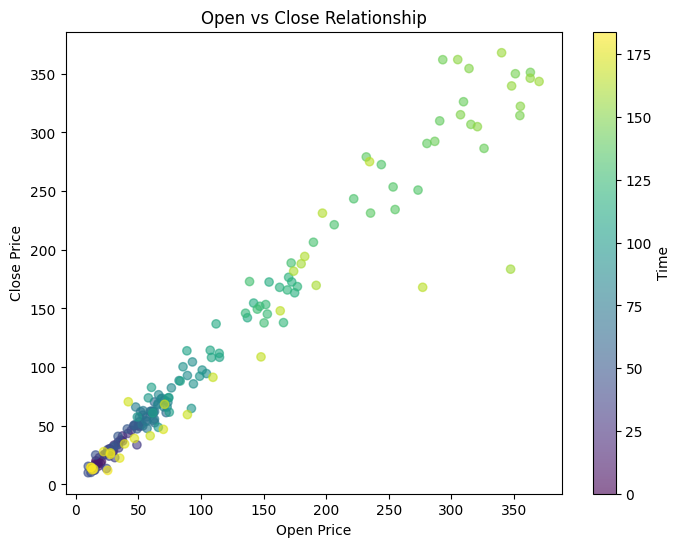

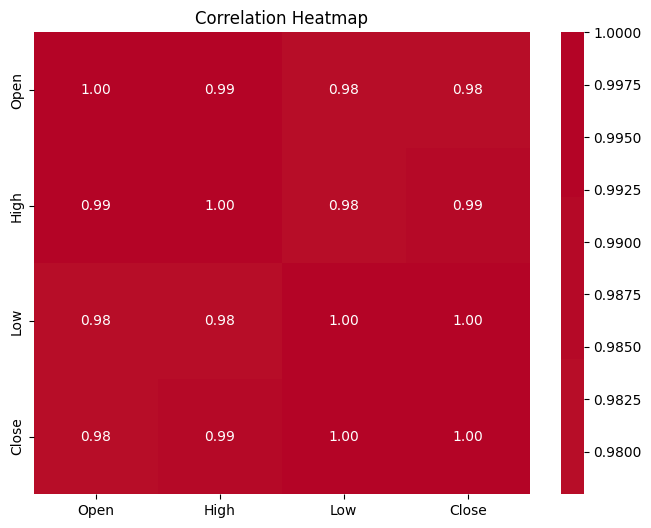

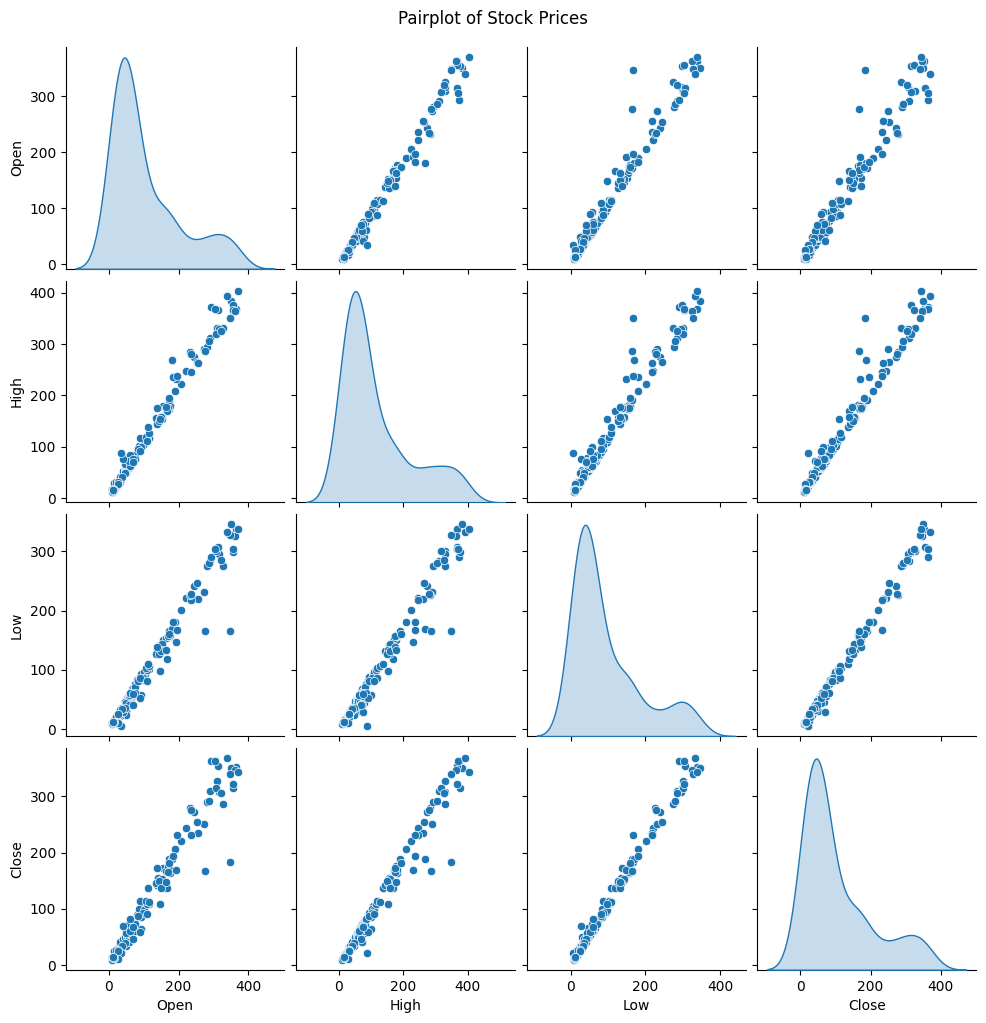

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Line Plot - All Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open', alpha=0.7)
plt.plot(df['Date'], df['High'], label='High', alpha=0.7)
plt.plot(df['Date'], df['Low'], label='Low', alpha=0.7)
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.7)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Histograms - Distribution of Each Price
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    axes[i].hist(df[col], bins=30, alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Box Plots - Outlier Detection
plt.figure(figsize=(10, 6))
df[['Open', 'High', 'Low', 'Close']].boxplot()
plt.title('Box Plots for Price Columns')
plt.ylabel('Price')
plt.show()

# 4. Violin Plots
plt.figure(figsize=(10, 6))
data_melted = df[['Open', 'High', 'Low', 'Close']].melt()
sns.violinplot(data=data_melted, x='variable', y='value')
plt.title('Violin Plots for Price Distribution')
plt.show()

# 5. Area Plot - Cumulative Price Movement
plt.figure(figsize=(12, 6))
plt.fill_between(df['Date'], df['Low'], df['High'], alpha=0.3, label='High-Low Range')
plt.plot(df['Date'], df['Close'], color='red', linewidth=2, label='Close')
plt.title('Price Range Area Chart')
plt.legend()
plt.show()

# 6. Rolling Averages
df['MA_12'] = df['Close'].rolling(window=12).mean()
df['MA_24'] = df['Close'].rolling(window=24).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.7)
plt.plot(df['Date'], df['MA_12'], label='12-Month MA', linewidth=2)
plt.plot(df['Date'], df['MA_24'], label='24-Month MA', linewidth=2)
plt.title('Moving Averages')
plt.legend()
plt.show()

# 7. Daily Returns
df['Returns'] = df['Close'].pct_change() * 100
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Returns'], color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Daily Returns (%)')
plt.ylabel('Return (%)')
plt.show()

# 8. Volatility (Rolling Std)
df['Volatility'] = df['Returns'].rolling(window=12).std()
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Volatility'], color='orange', linewidth=2)
plt.title('12-Period Rolling Volatility')
plt.ylabel('Volatility')
plt.show()

# 9. Price Range Over Time
df['Range'] = df['High'] - df['Low']
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Range'], color='purple')
plt.title('Daily Price Range (High - Low)')
plt.ylabel('Price Range')
plt.show()

# 10. Monthly Seasonality
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='Close')
plt.title('Close Price by Month')
plt.show()

# 11. Yearly Trends
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Year', y='Close')
plt.title('Close Price by Year')
plt.xticks(rotation=45)
plt.show()

# 12. Density Plots
plt.figure(figsize=(10, 6))
for col in ['Open', 'High', 'Low', 'Close']:
    sns.kdeplot(df[col], label=col)
plt.title('Density Plots for All Prices')
plt.legend()
plt.show()

# 13. Scatter Plot: Open vs Close
plt.figure(figsize=(8, 6))
plt.scatter(df['Open'], df['Close'], alpha=0.6, c=range(len(df)), cmap='viridis')
plt.colorbar(label='Time')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open vs Close Relationship')
plt.show()

# 14. Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df[['Open', 'High', 'Low', 'Close']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 15. Pairplot
sns.pairplot(df[['Open', 'High', 'Low', 'Close']], diag_kind='kde')
plt.suptitle('Pairplot of Stock Prices', y=1.02)
plt.show()
